Le but est de mettre en place un classificateur pour classifier les image des chiens et des chats

In [11]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [12]:
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

le dataset se divise en train et test set
1000 images dans le train set et 200 dans le test
chaque image est de dimensions 64 * 64

In [13]:
X_train, y_train, X_test, y_test = load_data()

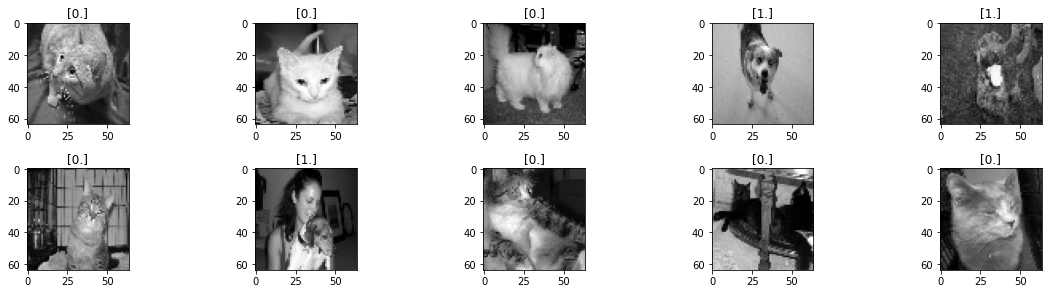

In [15]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [6]:
# Normaliser X_train
X_train_norm = X_train / X_train.max()

# Normaliser X_test
X_test_norm = X_test / X_test.max()

# Aplatir X_train
X_train = X_train_norm.reshape(1000, 64 * 64)

# Aplatir X_test
X_test = X_test_norm.reshape(200, 64 * 64)

In [8]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, Y):
    m = len(Y)
    norm = 1/m
    epsilon = 1e-15
    somme = np.sum(-Y * np.log(A + epsilon) - (1 - Y) * np.log(1-A + epsilon))
    return norm * somme

def gradients(A, X, Y):
    m = len(Y)
    dW = 1/m * np.dot(X.T, A - Y)
    db = 1/m * np.sum(A - Y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5




def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
           #faire ces calcules chaque 10 itérations
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    # Afficher les différents plot de cout et d'accuracy-score du train et du test
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

100%|████████████████████████████████████| 10000/10000 [01:00<00:00, 165.81it/s]


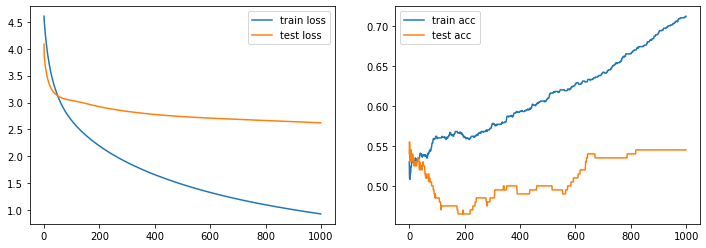

In [9]:
W , b = artificial_neuron(X_train, y_train, X_test, y_test, 0.01, 10000)

Dans notre cas, on tombe sur un problème d'overfitting ou le modèle est plus performant sur le train set que le test set. c'est due au manque de données et que notre problème n'est pas vraiment linéairement séparable et qu'on doit utiliser un modèle plus sophestiqué pour cette classification.